# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from scipy import stats     
import time
import statsmodels.api as sm
import pickle
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.max_columns',None)
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
## Checking datatype
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Checking foe null values

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Checking the information and data types of columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Total Charges should be float datatype but it shows as object datatype. We need to insepect and correct it

In [7]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Total Charges has 11 null values hance we have to drop them.

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Statistical Summary

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Obseravtion

- None of the columns has missing values.

- Total Charges is right skewed and it conatain outliers because the difference between 3rd quantile and max values is very high.

- Monthly charges is little left skewed because mean is greater than median here

In [13]:
df.drop('customerID',axis=1,inplace=True)

# EDA

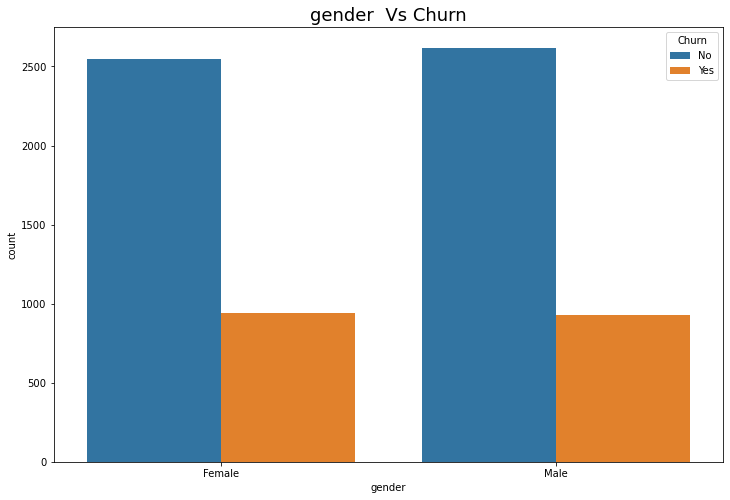

In [14]:
plt.figure(figsize=(12,8))
plt.title("gender  Vs Churn",fontsize=18)
sns.countplot(df['gender'],hue='Churn',data=df)
plt.show()

 There is approximatly similar ratio for churners and non-churners.

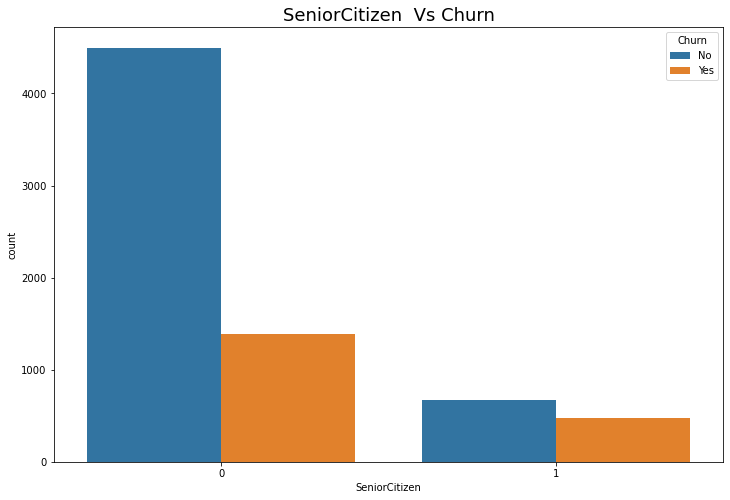

In [15]:
plt.figure(figsize=(12,8))
plt.title("SeniorCitizen  Vs Churn",fontsize=18)
sns.countplot(df['SeniorCitizen'],hue='Churn',data=df)
plt.show()

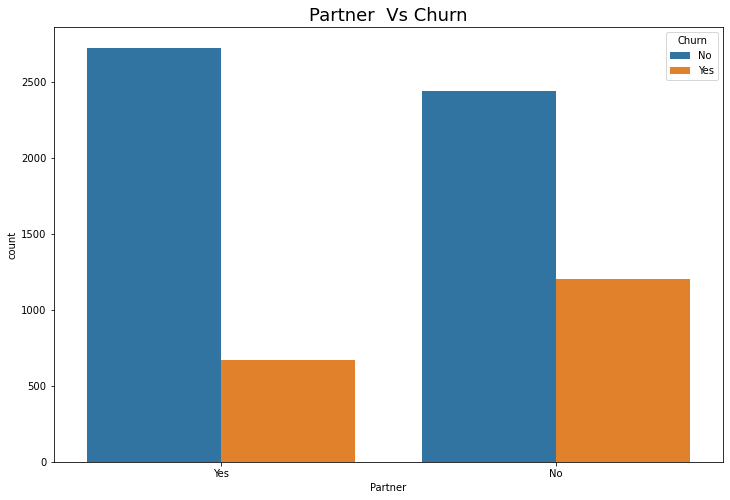

In [16]:
plt.figure(figsize=(12,8))
plt.title("Partner  Vs Churn",fontsize=18)
sns.countplot(df['Partner'],hue='Churn',data=df)
plt.show()

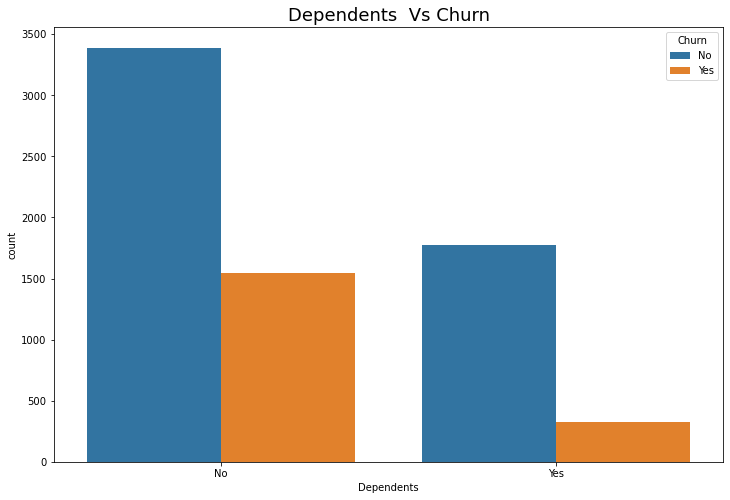

In [17]:
plt.figure(figsize=(12,8))
plt.title("Dependents  Vs Churn",fontsize=18)
sns.countplot(df['Dependents'],hue='Churn',data=df)
plt.show()

People who has no dependents seems more to switch to different network.

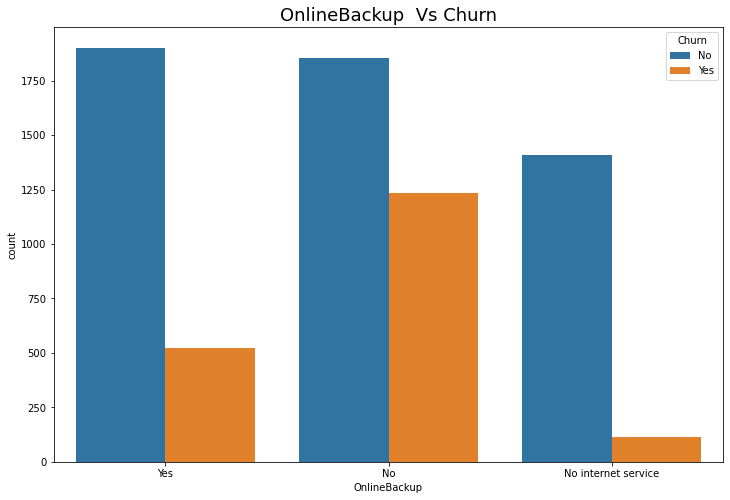

In [18]:
plt.figure(figsize=(12,8))
plt.title("OnlineBackup  Vs Churn",fontsize=18)
sns.countplot(df['OnlineBackup'],hue='Churn',data=df)
plt.show()

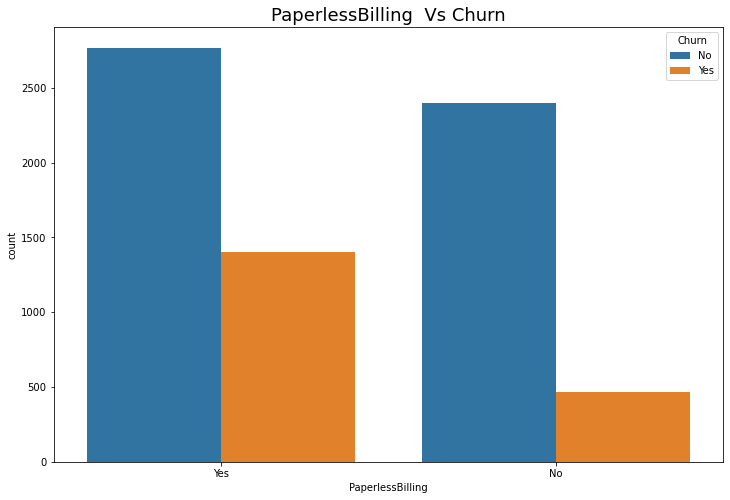

In [19]:
plt.figure(figsize=(12,8))
plt.title("PaperlessBilling  Vs Churn",fontsize=18)
sns.countplot(df['PaperlessBilling'],hue='Churn',data=df)
plt.show()

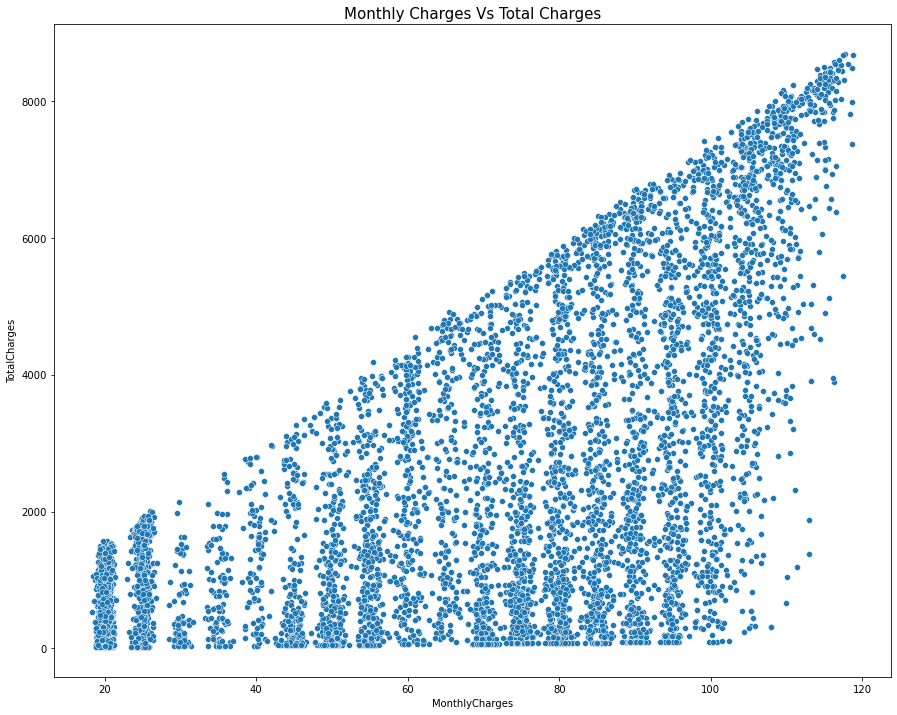

In [20]:
plt.figure(figsize=(15,12))
plt.title('Monthly Charges Vs Total Charges',fontsize=15)
sns.scatterplot(df['MonthlyCharges'],df['TotalCharges'])
plt.show()

<Figure size 1080x720 with 0 Axes>

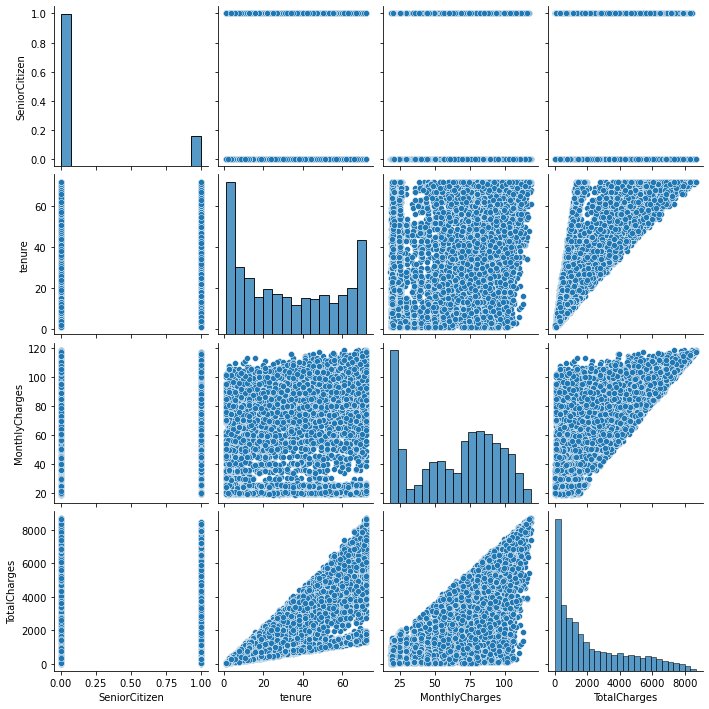

In [21]:
plt.figure(figsize=(15,10))
sns.pairplot(df)
plt.show()

# Checking Distribution

In [22]:
num_var =[]
cat_var = []
for i in df.columns:
    if df[i].dtype == "object":
        cat_var.append(i)
    else:
        num_var.append(i)     

In [23]:
num_var

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

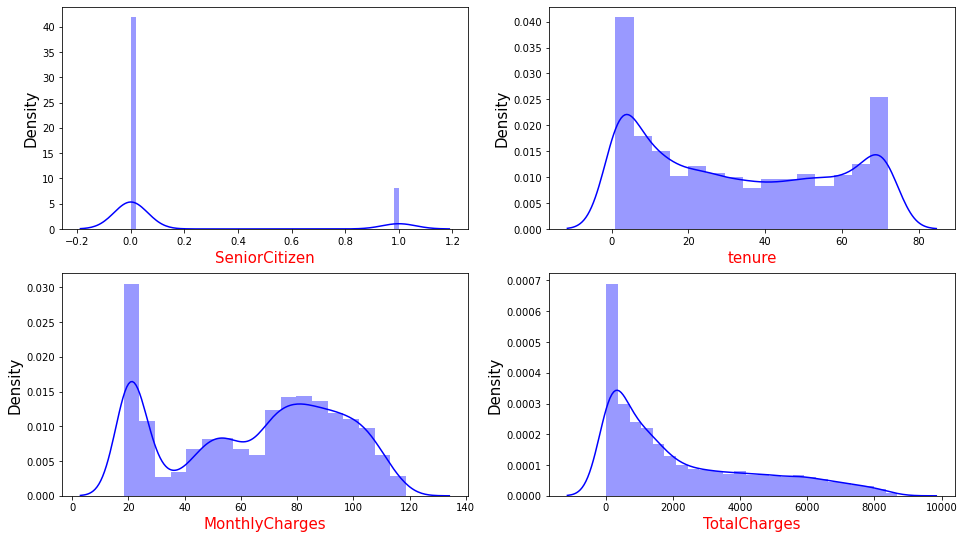

In [24]:
plt.figure(figsize=(16,9))
for i ,j in enumerate(num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df[j],color='b')
    plt.xlabel(j,fontsize=15,color='r',)
    plt.ylabel('Density',fontsize=15,color='k')
plt.show()   

# Checking for outliers

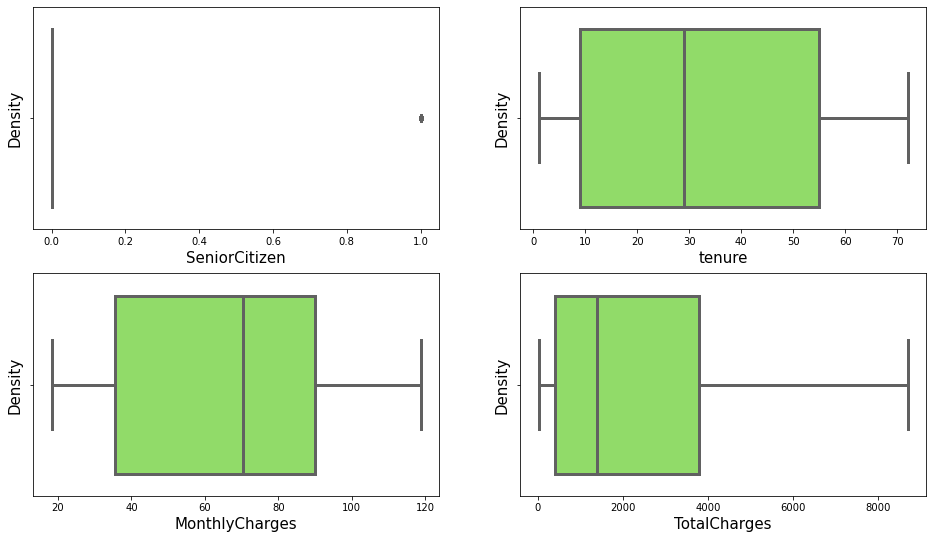

In [25]:
plt.figure(figsize=(16,9))
for i ,j in enumerate(num_var):
    plt.subplot(2,2,i+1)
    sns.boxplot(df[j],color='#8BEE56',width=0.8,linewidth=3)
    plt.xlabel(j,fontsize=15,color='k',)
    plt.ylabel('Density',fontsize=15,color='k')
plt.show()  

None of the columns has outliers

# Skewness

In [26]:
df.skew()

SeniorCitizen     1.831103
tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

In [27]:
columns_with_skewness=[]
for i in num_var:
    if df[i].skew() > 0.5:
        columns_with_skewness.append(i)

In [28]:
columns_with_skewness

['SeniorCitizen', 'TotalCharges']

In [29]:
for i, j in enumerate(columns_with_skewness):
    df[j],params = stats.boxcox(df[j]+0.01)

In [30]:
df.skew()

SeniorCitizen     1.831103
tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges     -0.145747
dtype: float64

In [31]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier,BaggingClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc

# Label Encoding

In [32]:
le  = LabelEncoder()

In [33]:
df["Churn"]=le.fit_transform(df["Churn"])

In [34]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,-324.238446,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,5.399945,0
1,Male,-324.238446,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,22.899514,0
2,Male,-324.238446,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,9.018497,1
3,Male,-324.238446,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,22.721481,0
4,Female,-324.238446,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,10.182542,1


# Ordinal Encoding

In [35]:
oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

df=ordinal_encode(df, ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,-324.238446,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,5.399945,0
1,1.0,-324.238446,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,22.899514,0
2,1.0,-324.238446,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,9.018497,1
3,1.0,-324.238446,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,22.721481,0
4,0.0,-324.238446,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,10.182542,1


In [36]:
df.shape

(7032, 20)

<AxesSubplot:title={'center':'Correlation with Churn'}>

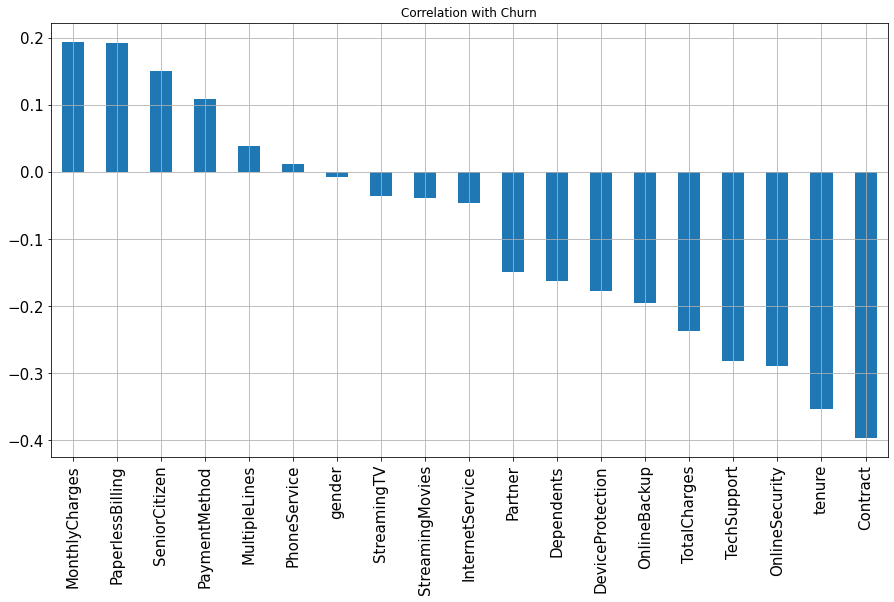

In [37]:
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot.bar(figsize=(15,8),grid=True,title='Correlation with Churn',fontsize=15)

- We could see that neither very strong nor very weak correlation exists with the target attribute.

- Phone service and Gender have almost zero correlation.

- Most of attributes are negativly correlated with our target attribute.

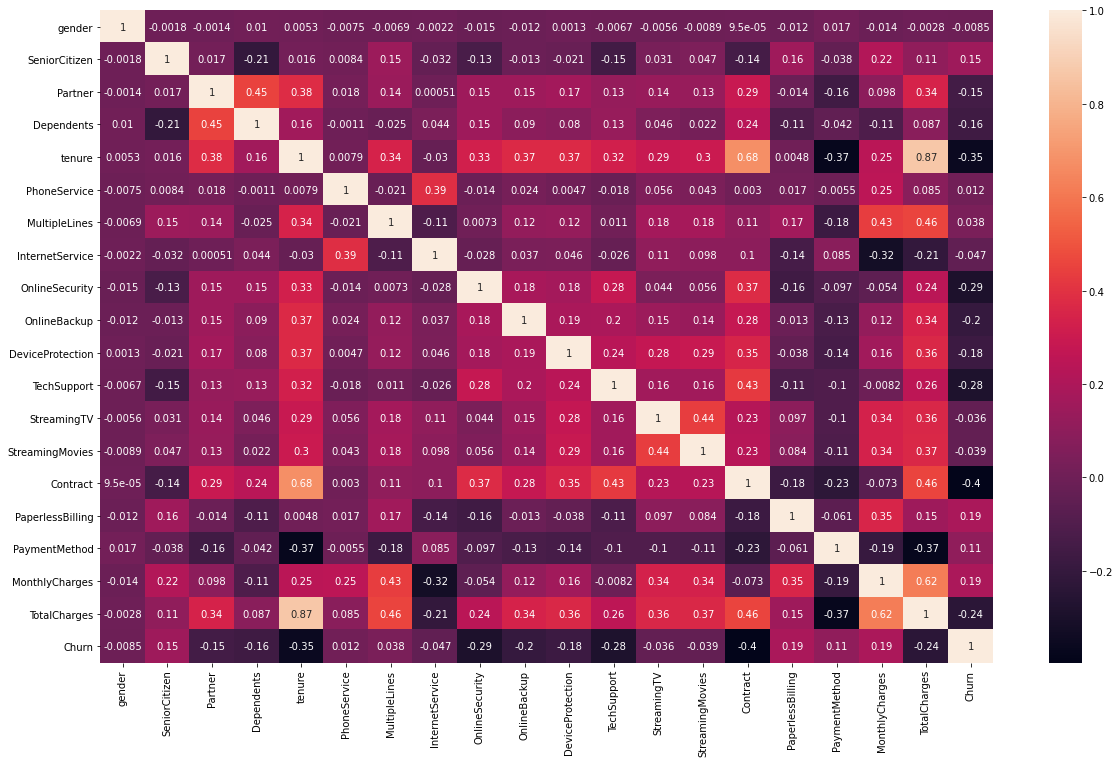

In [38]:
## Correlation Heatmap
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Split the data in X and Y

In [39]:
X=df.drop(['Churn'],axis=1)
y=df[['Churn']]

In [40]:
X.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,-324.238446,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,5.399945
1,1.0,-324.238446,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,22.899514


In [41]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009430,-0.440327,1.035617,-0.652305,-1.280248,-3.056334,0.062666,-1.183614,-0.917837,1.242875,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,0.399805,-1.161694,-1.812527
1,0.990658,-0.440327,-0.965608,-0.652305,0.064303,0.327189,-0.991564,-1.183614,1.408012,-1.028998,1.245441,-0.924267,-1.112632,-1.121501,0.373926,-1.206361,1.336636,-0.260878,0.254070
2,0.990658,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.991564,-1.183614,1.408012,1.242875,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,1.336636,-0.363923,-1.385197
3,0.990658,-0.440327,-0.965608,-0.652305,0.512486,-3.056334,0.062666,-1.183614,1.408012,-1.028998,1.245441,1.396963,-1.112632,-1.121501,0.373926,-1.206361,-1.473857,-0.747850,0.233045
4,-1.009430,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.991564,0.172835,-0.917837,-1.028998,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,0.399805,0.196178,-1.247730


In [42]:
y.head(2)

,Churn
0,0
1,0


# Feature Importance

[0.03744183 0.02620661 0.03046156 0.0244893  0.14416152 0.00669926
 0.02713846 0.04081409 0.04786211 0.03257035 0.02837308 0.04465638
 0.02273084 0.02350148 0.07244358 0.02991197 0.06388176 0.13446828
 0.16218754]


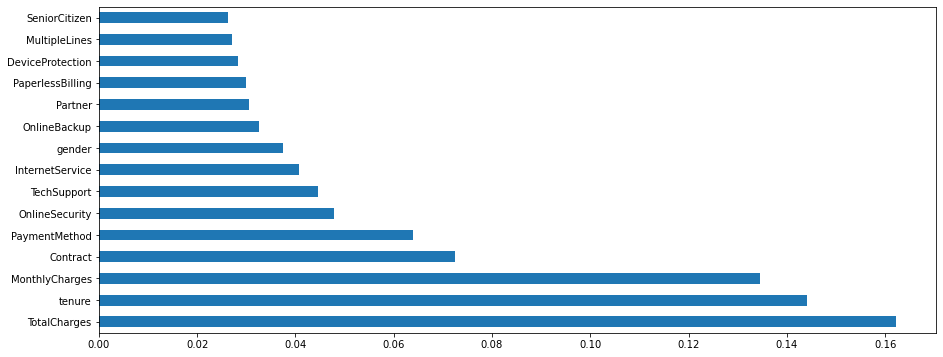

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
selection=ExtraTreesClassifier()
selection.fit(X,y)
print(selection.feature_importances_)
plt.figure(figsize=(15,6))
feat_importances=pd.Series(selection.feature_importances_,index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

We could see Total Charges,Monthly Charges and Contract for 2 years are top 3 most important features to predict the churn in our dataset.

In [44]:
X=X[['gender', 'SeniorCitizen', 'Partner','tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']]

In [45]:
y.value_counts()

Churn
0        5163
1        1869
dtype: int64

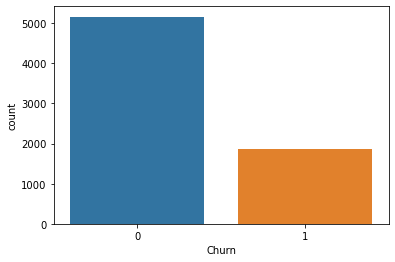

In [46]:
sns.countplot(df['Churn'])
plt.show()

output classes are imbalanced so we have to perform SMOTE to make classes balanced

# SMOTE

In [47]:
smote = SMOTE(sampling_strategy="minority")
X, y = smote.fit_resample(X,y)

In [48]:
y.value_counts()

Churn
1        5163
0        5163
dtype: int64

# Creating function to check best performing model

In [49]:
def max_accuracy_score(pipe,X,y):
    max_accuracy=0
    for i in range(42,100):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i,stratify=y)
        pipe.fit(X_train,y_train)
        y_pred=pipe.predict(X_test)
        accuracy_check=accuracy_score(y_test,y_pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max Accuracy score corresponding to', final_r,'is' ,    round( max_accuracy ,2) *100)
    print('cross validation score',cross_val_score(pipe,X,y,scoring='accuracy').mean())
    print('Standard Deviation',cross_val_score(pipe,X,y,scoring='accuracy').std())
    print('Training accuracy',round( pipe.score(X_train,y_train),2)*100)
    print('Test Accuracy',round(pipe.score(X_test,y_test),2)*100)
    print('Confusion Matrix')
    print(confusion_matrix(y_test,y_pred))

# LogisticRegression

In [50]:
lr=LogisticRegression()
max_accuracy_score(lr,X,y)

max Accuracy score corresponding to 63 is 79.0
cross validation score 0.7728069118601877
Standard Deviation 0.008018208851785098
Training accuracy 77.0
Test Accuracy 78.0
Confusion Matrix
[[779 254]
 [209 824]]


# DecisionTreeClassifier

In [51]:
dt=DecisionTreeClassifier()
max_accuracy_score(dt,X,y)

max Accuracy score corresponding to 75 is 80.0
cross validation score 0.7788183644337352
Standard Deviation 0.053790620281261796
Training accuracy 100.0
Test Accuracy 79.0
Confusion Matrix
[[797 236]
 [208 825]]


# KNeighborsClassifier

In [52]:
knn=KNeighborsClassifier()
max_accuracy_score(knn,X,y)

max Accuracy score corresponding to 97 is 81.0
cross validation score 0.7945986325355285
Standard Deviation 0.01981388538797114
Training accuracy 86.0
Test Accuracy 79.0
Confusion Matrix
[[723 310]
 [122 911]]


# Naive Bayse

In [53]:
gnb=GaussianNB()
max_accuracy_score(gnb,X,y)

max Accuracy score corresponding to 51 is 79.0
cross validation score 0.7663187922058745
Standard Deviation 0.008869588822751552
Training accuracy 77.0
Test Accuracy 76.0
Confusion Matrix
[[753 280]
 [217 816]]


# RandomForestClassifier

In [54]:
rf=RandomForestClassifier()
max_accuracy_score(rf,X,y)

max Accuracy score corresponding to 44 is 86.0
cross validation score 0.8461237281103722
Standard Deviation 0.05266750165729565
Training accuracy 100.0
Test Accuracy 85.0
Confusion Matrix
[[864 169]
 [147 886]]


# Adaboost

In [55]:
Adb=AdaBoostClassifier()
max_accuracy_score(Adb,X,y)

max Accuracy score corresponding to 44 is 83.0
cross validation score 0.8101924623033128
Standard Deviation 0.0360490708534013
Training accuracy 81.0
Test Accuracy 81.0
Confusion Matrix
[[805 228]
 [156 877]]


# Gardient Boost

In [56]:
gb=GradientBoostingClassifier()
max_accuracy_score(gb,X,y)

max Accuracy score corresponding to 44 is 85.0
cross validation score 0.8283046393939465
Standard Deviation 0.052116236064116785
Training accuracy 85.0
Test Accuracy 84.0
Confusion Matrix
[[843 190]
 [145 888]]


# ExtraTReeRegressor

In [57]:
etc=ExtraTreesClassifier()
max_accuracy_score(etc,X,y)

max Accuracy score corresponding to 56 is 87.0
cross validation score 0.8581303193172521
Standard Deviation 0.04197804597948544
Training accuracy 100.0
Test Accuracy 86.0
Confusion Matrix
[[867 166]
 [133 900]]


# Selecting Gardient Boost as a best performing model

In [58]:
pipe=GradientBoostingClassifier()
for i in range(0,101):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i,stratify=y)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    accuracy_check=accuracy_score(y_test,y_pred)
    print("at ",i)
    print('Training accuracy',round( pipe.score(X_train,y_train),2)*100)
    print('Test Accuracy',round(pipe.score(X_test,y_test),2)*100)
    print()

at  0
Training accuracy 85.0
Test Accuracy 84.0

at  1
Training accuracy 85.0
Test Accuracy 84.0

at  2
Training accuracy 85.0
Test Accuracy 84.0

at  3
Training accuracy 85.0
Test Accuracy 83.0

at  4
Training accuracy 85.0
Test Accuracy 84.0

at  5
Training accuracy 85.0
Test Accuracy 83.0

at  6
Training accuracy 85.0
Test Accuracy 83.0

at  7
Training accuracy 85.0
Test Accuracy 84.0

at  8
Training accuracy 85.0
Test Accuracy 83.0

at  9
Training accuracy 85.0
Test Accuracy 83.0

at  10
Training accuracy 85.0
Test Accuracy 84.0

at  11
Training accuracy 85.0
Test Accuracy 84.0

at  12
Training accuracy 85.0
Test Accuracy 84.0

at  13
Training accuracy 85.0
Test Accuracy 86.0

at  14
Training accuracy 85.0
Test Accuracy 85.0

at  15
Training accuracy 85.0
Test Accuracy 83.0

at  16
Training accuracy 85.0
Test Accuracy 84.0

at  17
Training accuracy 85.0
Test Accuracy 83.0

at  18
Training accuracy 85.0
Test Accuracy 83.0

at  19
Training accuracy 85.0
Test Accuracy 82.0

at  20
Tra

In [59]:
pipe=GradientBoostingClassifier()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=34,stratify=y)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
accuracy_check=accuracy_score(y_test,y_pred)
print('Training accuracy',round( pipe.score(X_train,y_train),2)*100)
print('Test Accuracy',round(pipe.score(X_test,y_test),2)*100)
print('cross validation score',cross_val_score(pipe,X,y,scoring='accuracy').mean())
print('Standard Deviation',cross_val_score(pipe,X,y,scoring='accuracy').std())
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print()

Training accuracy 85.0
Test Accuracy 85.0
cross validation score 0.8284014916941886
Standard Deviation 0.05203882732032495
Confusion Matrix
[[858 175]
 [132 901]]



# Hyper parameter tuning

In [66]:
params = {  

    "learning_rate":np.arange(0.1,0.5,0.01),
    "n_estimators":np.arange(100,501,50),
    "max_depth":np.arange(3,15,1),
    "max_features":np.arange(.5,.80,.05)
    
}    

In [67]:
randomscv = RandomizedSearchCV(pipe , params,scoring='accuracy',n_jobs=-1,random_state=42)

In [68]:
randomscv.fit(X,y)

RandomizedSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.14999999999999997,
                                                        max_depth=9,
                                                        max_features=0.7000000000000002),
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49]),
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_features': array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 ]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500])},
                   random_state=42, scoring='accuracy')

In [69]:
randomscv.best_params_

{'n_estimators': 450,
 'max_features': 0.5,
 'max_depth': 14,
 'learning_rate': 0.23999999999999994}

In [70]:
pipe=GradientBoostingClassifier(n_estimators=450,max_features=0.5,max_depth=14,learning_rate=0.23999999999999994)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=34,stratify=y)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
accuracy_check=accuracy_score(y_test,y_pred)
print('Training accuracy',round( pipe.score(X_train,y_train),2)*100)
print('Test Accuracy',round(pipe.score(X_test,y_test),2)*100)
print('cross validation score',cross_val_score(pipe,X,y,scoring='accuracy').mean())
print('Standard Deviation',cross_val_score(pipe,X,y,scoring='accuracy').std())
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print()

Training accuracy 100.0
Test Accuracy 86.0
cross validation score 0.8437045301655536
Standard Deviation 0.06788577918953638
Confusion Matrix
[[889 144]
 [140 893]]



# Saving model

In [71]:
pickle.dump(pipe,open('Churn.pkl','wb'))